In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score

# for non-Kaggle, local notebooks, use the below statement to load the dataset
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()
# Features stored in breast_cancer.data() and target labels in breast_cancer.labels()

In [2]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#removing the first ID column and the last column containing all NaN values
data.drop(data.columns[[0, -1]], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
scaler = MinMaxScaler()

for column in data.columns:
    scaled = scaler.fit_transform(data[column].values.reshape(-1,1))
    data[column] = np.ravel(scaled)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [6]:
features = data.drop(['diagnosis'], axis = 1)
target = data['diagnosis']

<AxesSubplot:>

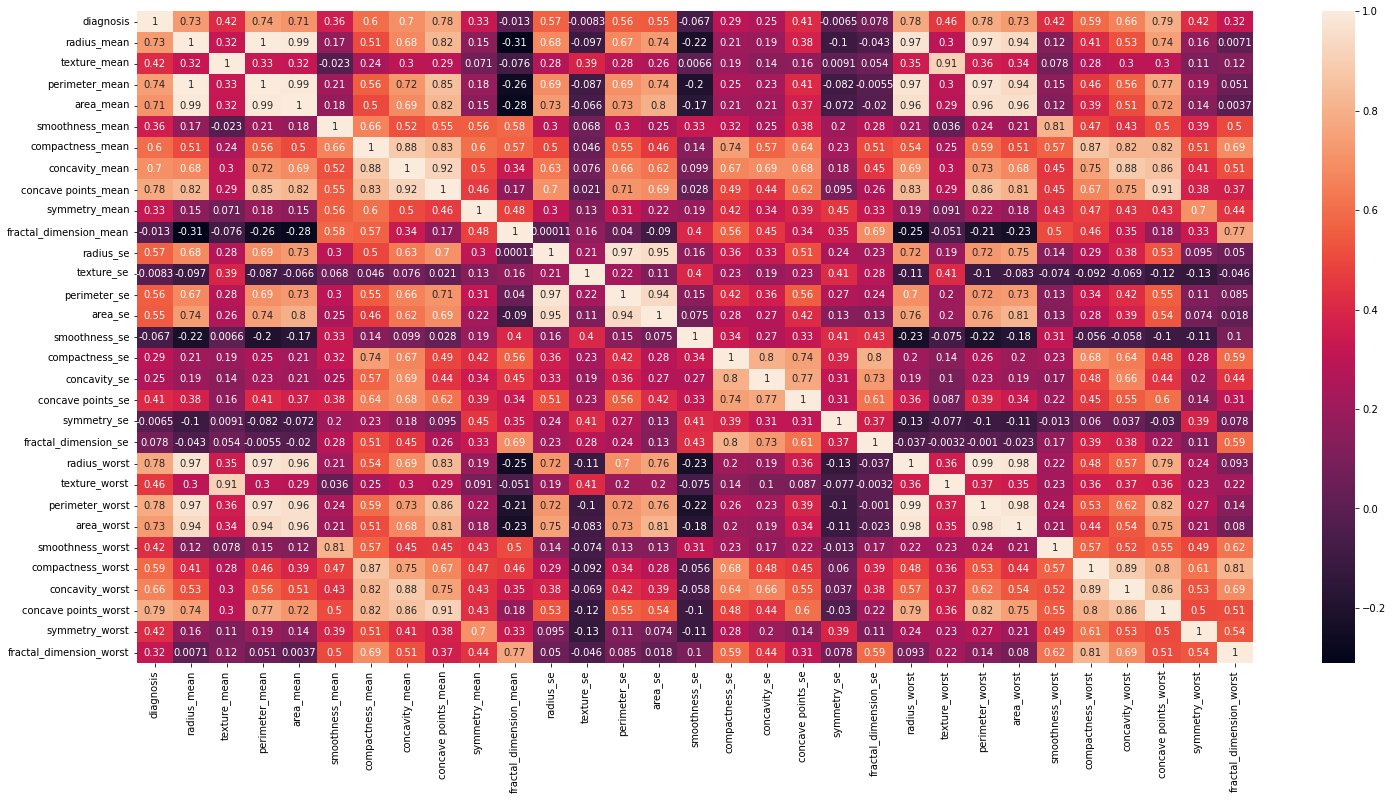

In [7]:
correlations = data.corr()

plt.figure(figsize = (25,12))
sns.heatmap(correlations, annot = True)

In [8]:
def check_correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = check_correlation(features, 0.8)
len(set(corr_features))

17

In [10]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [11]:
features_reduced = data.drop(corr_features, axis = 1)
features_reduced.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,1.0,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.356147,0.120469,0.159296,0.351398,0.300625,0.311645,0.598462
1,1.0,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.156437,0.082589,0.119387,0.081323,0.253836,0.084539,0.233590
2,1.0,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.229622,0.094303,0.150831,0.283955,0.389847,0.205690,0.403706
3,1.0,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.139091,0.175875,0.251453,0.543215,0.353665,0.728148,1.000000
4,1.0,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.233822,0.093065,0.332359,0.167918,0.357075,0.136179,0.157500


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 41)
X_train_reduced, X_test_reduced, Y_train_reduced, Y_test_reduced = train_test_split(features_reduced, target, test_size = 0.2, random_state = 23)

In [13]:
def display_metrics(test, pred):
    print(f"The precision score is: {precision_score(test, pred)}")
    print(f"The recall score is: {recall_score(test, pred)}")
    print(f"The F1 score is: {f1_score(test, pred)}")    
    print(f"The error rate is: {1 - accuracy_score(test, pred)}\n\n")

In [14]:
#Comparing performance of classifiers for Bayesian Classifiers

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


gnb.fit(X_train, Y_train)
predicted = gnb.predict(X_test)

print("For all the features, the metrics are: ")
display_metrics(Y_test, predicted)

gnb_reduced = GaussianNB()

gnb_reduced.fit(X_train_reduced, Y_train_reduced)
predicted_reduced = gnb_reduced.predict(X_test_reduced)

print("For the selected features, the metrics are: ")
display_metrics(Y_test_reduced, predicted_reduced)


For all the features, the metrics are: 
The precision score is: 0.95
The recall score is: 0.95
The F1 score is: 0.9500000000000001
The error rate is: 0.03508771929824561


For the selected features, the metrics are: 
The precision score is: 1.0
The recall score is: 1.0
The F1 score is: 1.0
The error rate is: 0.0




In [15]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion = 'gini')
DT.fit(X_train, Y_train)
predicted = DT.predict(X_test)

print("For all features, Decision Tree classifier metrics are: ")
display_metrics(Y_test, predicted)

DT_reduced = DecisionTreeClassifier(criterion = 'gini')
DT_reduced.fit(X_train_reduced, Y_train_reduced)
predicted_reduced = DT_reduced.predict(X_test_reduced)

print("For selected features, Decision Tree classifier metrics are: ")
display_metrics(Y_test_reduced, predicted_reduced)

For all features, Decision Tree classifier metrics are: 
The precision score is: 0.8666666666666667
The recall score is: 0.975
The F1 score is: 0.9176470588235294
The error rate is: 0.06140350877192979


For selected features, Decision Tree classifier metrics are: 
The precision score is: 1.0
The recall score is: 1.0
The F1 score is: 1.0
The error rate is: 0.0




In [16]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth = 10, random_state = 36)
RF.fit(X_train, Y_train)
predicted = RF.predict(X_test)

print("For all features, the Random Forest Classifier metrics are: ")
display_metrics(Y_test, predicted)

RF_reduced = RandomForestClassifier(max_depth = 10, random_state = 36)
RF_reduced.fit(X_train_reduced, Y_train_reduced)
predicted_reduced = RF_reduced.predict(X_test_reduced)

print("For the selected features, the Random Forest Classifier metrics are: ")
display_metrics(Y_test_reduced, predicted_reduced)

For all features, the Random Forest Classifier metrics are: 
The precision score is: 0.975609756097561
The recall score is: 1.0
The F1 score is: 0.9876543209876543
The error rate is: 0.00877192982456143


For the selected features, the Random Forest Classifier metrics are: 
The precision score is: 1.0
The recall score is: 1.0
The F1 score is: 1.0
The error rate is: 0.0




In [17]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")
svc.fit(X_train, Y_train)
predicted = svc.predict(X_test)

print("For all features, the Support Vector Classifier metrics are: ")
display_metrics(Y_test, predicted)

svc_reduced = SVC(kernel="rbf")
svc_reduced.fit(X_train_reduced, Y_train_reduced)
predicted_reduced = svc_reduced.predict(X_test_reduced)

print("For the selected features, the Support Vector Classifier metrics are: ")
display_metrics(Y_test_reduced, predicted_reduced)

For all features, the Support Vector Classifier metrics are: 
The precision score is: 0.975
The recall score is: 0.975
The F1 score is: 0.975
The error rate is: 0.01754385964912286


For the selected features, the Support Vector Classifier metrics are: 
The precision score is: 1.0
The recall score is: 1.0
The F1 score is: 1.0
The error rate is: 0.0




In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')
knn.fit(X_train, Y_train)
predicted = knn.predict(X_test)

print("For all features, the KNN classifier metrics are: ")
display_metrics(Y_test, predicted)

knn_reduced = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')
knn_reduced.fit(X_train_reduced, Y_train_reduced)
predicted_reduced = knn_reduced.predict(X_test_reduced)

print("For t features, the KNN classifier metrics are: ")
display_metrics(Y_test_reduced, predicted_reduced)

For all features, the KNN classifier metrics are: 
The precision score is: 0.975
The recall score is: 0.975
The F1 score is: 0.975
The error rate is: 0.01754385964912286


For t features, the KNN classifier metrics are: 
The precision score is: 1.0
The recall score is: 1.0
The F1 score is: 1.0
The error rate is: 0.0


